In [28]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})
params= {'text.latex.preamble' : r'\usepackage{amsmath},\usepackage{amssymb}'}
plt.rcParams.update(params)

In [29]:
def Fem(p, n=2, eps=1, delta=1):
    y = -np.log(p) * (1 - 1 / (1 + (n-1)*p))
    return y * 2 * delta / eps
    
def Fpf(p, n=2, eps=1, delta=1):
    y = np.log(p) * ((1 - (1-p)**n) / (n*p) - 1)
    return y * 2 * delta / eps

def Flb(p, n=2, eps=1, delta=1):
    return 0.5*delta/eps*np.log(n)*np.ones_like(p)

def Fub(p, n=2, eps=1, delta=1):
    return 2*delta/eps*np.log(n)*np.ones_like(p)

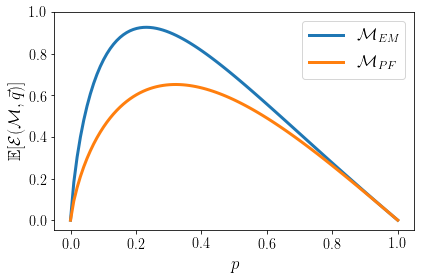

In [30]:
p = np.linspace(1e-6,1-1e-6,100)
plt.plot(p, Fem(p, n=3), linewidth=3, label='$\mathcal{M}_{EM}$')
plt.plot(p, Fpf(p, n=3), linewidth=3, label='$\mathcal{M}_{PF}$')
#plt.plot(p, Fub(p, n=3), '--', linewidth=3, label='$\\frac{2 \Delta}{\epsilon} \log{(n)}$')
plt.legend(fontsize='xx-large')
plt.xlabel('$p$', fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],fontsize='x-large')
plt.ylabel('$\mathbb{E}[\\mathcal{E}(\mathcal{M}, \\vec q)]$', fontsize='xx-large')
plt.tight_layout()
plt.savefig('em_vs_pf_1.pdf')

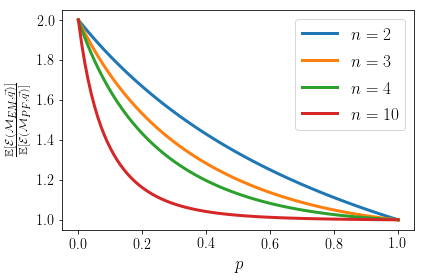

In [34]:
p = np.linspace(1e-6,1-1e-6,100)
plt.plot(p, Fem(p, n=2)/Fpf(p, n=2), linewidth=3, label='$n=2$')
plt.plot(p, Fem(p, n=3)/Fpf(p, n=3), linewidth=3, label='$n=3$')
plt.plot(p, Fem(p, n=4)/Fpf(p, n=4), linewidth=3, label='$n=4$')
plt.plot(p, Fem(p, n=10)/Fpf(p, n=10), linewidth=3, label='$n=10$')
#plt.plot(p, Fem(p, n=3), linewidth=3)
#plt.plot(p, Fpf(p, n=3), linewidth=3)
plt.legend(fontsize='xx-large')
plt.xlabel('$p$', fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.ylabel('$\\frac{\mathbb{E}[\mathcal{E}(\mathcal{M}_{EM}, \\vec q)]}{\mathbb{E}[\mathcal{E}(\mathcal{M}_{PF}, \\vec q)]}$', fontsize='xx-large')
plt.tight_layout()
plt.savefig('em_vs_pf_2.pdf')

In [ ]:
from scipy.optimize import minimize_scalar
def foo(n):
    a = minimize_scalar(lambda p: -Fem(p,n), bounds=(0,1), method='bounded').fun
    b = minimize_scalar(lambda p: -Fpf(p,n), bounds=(0,1), method='bounded').fun
    return a/b

ns = np.arange(2, 1000)
y = [foo(n) for n in ns]
plt.plot(ns, y, linewidth=3)
plt.ylim(1, 2)
plt.xscale('log')
plt.xticks([1,10,100,1000],fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('n', fontsize='xx-large')
plt.ylabel('$\\frac{\max_{\\vec q} \quad \mathcal{F}(\mathcal{M}_{EM}, \\vec q)}{\max_{\\vecq} \quad \mathcal{F}(\mathcal{M}_{PF}, \\vec q)}$', fontsize='xx-large')
plt.tight_layout()
plt.savefig('em_vs_pf_3.pdf')

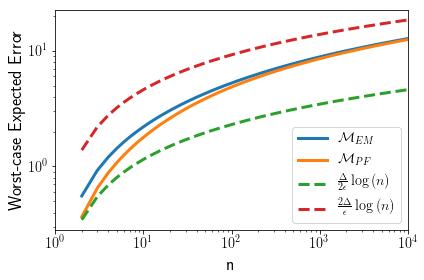

In [36]:
from scipy.optimize import minimize_scalar
def bar(n, F=Fem):
    return -minimize_scalar(lambda p: -F(p,n), bounds=(0,1), method='bounded').fun

eps, delta = 1.0, 1.0
ns = np.arange(2, 10000)
lb = 0.5*delta/eps*np.log(ns)
ub = 2.0*delta/eps*np.log(ns)
mid = 1.0*delta/eps*np.log(ns)
y = [bar(n, Fem) for n in ns]
z = [bar(n, Fpf) for n in ns]
plt.plot(ns, y, linewidth=3, label='$\mathcal{M}_{EM}$')
plt.plot(ns, z, linewidth=3, label='$\mathcal{M}_{PF}$')
plt.plot(ns, lb, '--', linewidth=3, label='$\\frac{\Delta}{2 \epsilon} \log{(n)}$')
plt.plot(ns, ub, '--', linewidth=3, label='$\\frac{2 \Delta}{\epsilon} \log{(n)}$')
#plt.plot(ns, mid, 'k--', linewidth=3, label='$\\frac{\Delta}{\epsilon} \log{(n)}$')
#plt.xscale('log')
plt.xlim(1,10000)
plt.xticks([1,10,100,1000,10000],fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xlabel('n', fontsize='xx-large')
plt.loglog()
#plt.xscale('log')
plt.legend(fontsize='x-large', loc='lower right')
plt.ylabel('Worst-case Expected Error', fontsize='xx-large')
#plt.ylabel('$\\frac{\max_{\\vec q} \quad \mathcal{F}(\mathcal{M}_{EM}, \\vec q)}{\max_{\\vecq} \quad \mathcal{F}(\mathcal{M}_{PF}, \\vec q)}$', fontsize='xx-large')
plt.tight_layout()
plt.savefig('em_vs_pf_4.pdf')

In [92]:
np.exp(1)

2.718281828459045